# Importation of Libary

In [2]:
#pip install --upgrade scikit-learn

In [31]:
import numpy as np
import pandas as pd
import os

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

from matplotlib import pyplot as plt
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence
import lime
import lime.lime_tabular
import shap

In [5]:
#pip install lime

In [8]:
#pip install shap

# Reading Data

In [10]:
df = pd.read_csv('HousingData.csv')

In [11]:
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2

# Data Description

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


# Finding and Replacing the Missing Values

In [13]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [14]:
df = df.fillna(df.mean())

In [15]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

# Target Variable for Predictive Model

In [16]:
X = df[['LSTAT','RM','NOX','PTRATIO','DIS','AGE']]
y = df['MEDV']

# Train-Test Split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Random Forest Model Building

In [18]:
model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, n_estimators=10, random_state=0)

# Prediction Generation

In [19]:
y_pred = model.predict(X_test)

# Performance Evaluation

In [21]:
mse = mean_squared_error(y_test, y_pred)**(0.5)
mse.round(3)

4.516

# Partial Dependence Plots (PDP)

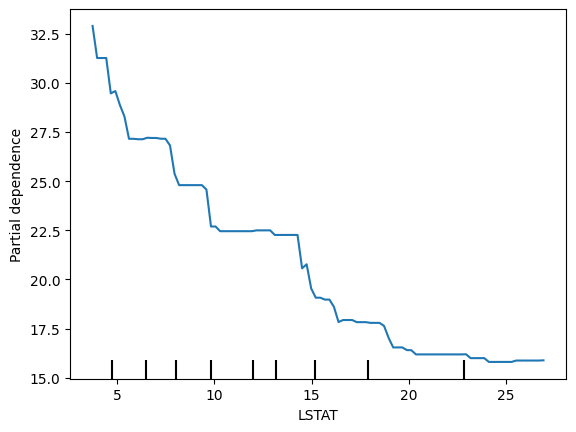

In [22]:
feat_name = 'LSTAT'
PartialDependenceDisplay.from_estimator(model, X, [feat_name])
plt.show()

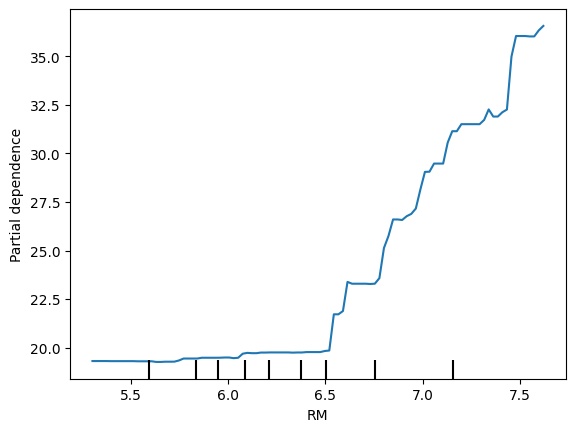

In [23]:
feat_name = 'RM'
PartialDependenceDisplay.from_estimator(model, X, [feat_name])
plt.show()

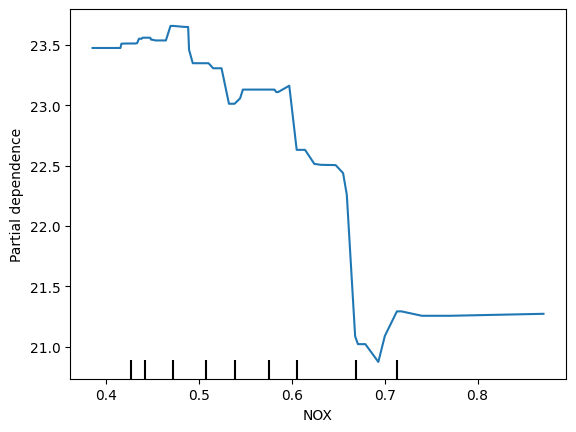

In [24]:
feat_name = 'NOX'
PartialDependenceDisplay.from_estimator(model, X, [feat_name])
plt.show()

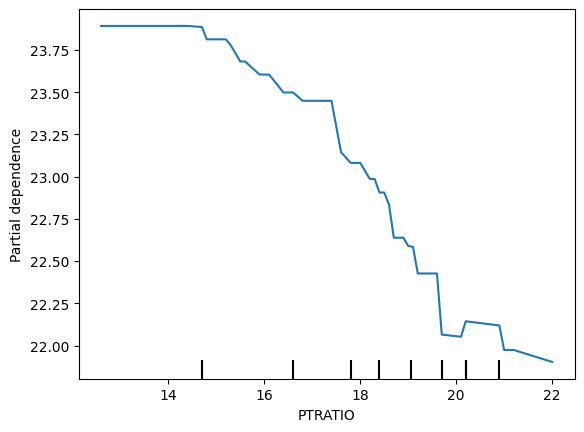

In [25]:
feat_name = 'PTRATIO'
PartialDependenceDisplay.from_estimator(model, X, [feat_name])
plt.show()

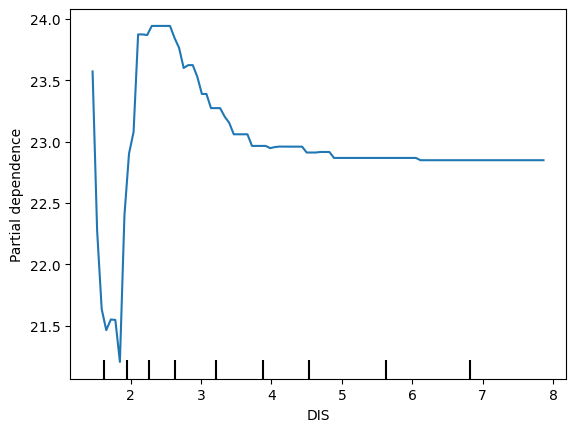

In [26]:
feat_name = 'DIS'
PartialDependenceDisplay.from_estimator(model, X, [feat_name])
plt.show()

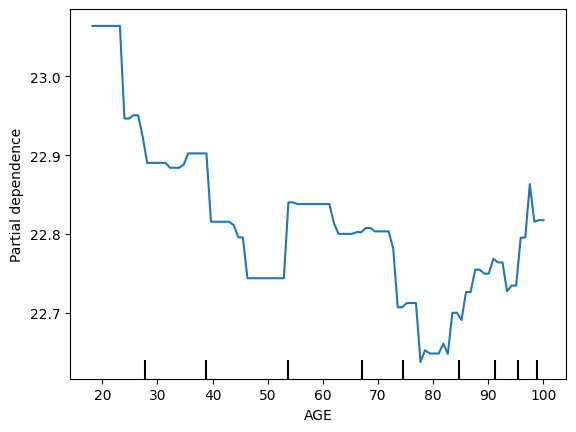

In [27]:
feat_name = 'AGE'
PartialDependenceDisplay.from_estimator(model, X, [feat_name])
plt.show()

# Local Surrogate (LIME) model

In [28]:
np.random.seed(42)
X = pd.DataFrame({
    'LSTAT': np.random.rand(100),
    'RM': np.random.rand(100),
    'NOX': np.random.rand(100),
    'PTRATIO': np.random.rand(100),
    'DIS': np.random.rand(100),
    'AGE': np.random.rand(100),
})
y = (X['LSTAT'] + X['RM'] + X['NOX'] + X['PTRATIO'] + X['DIS'] + X['AGE'] > 3).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

explainer_lime = lime.lime_tabular.LimeTabularExplainer(X_train.values, mode="classification", feature_names=X.columns)

instance_idx = 0
instance = X_test.iloc[instance_idx]
true_class = y_test.iloc[instance_idx]

explanation = explainer_lime.explain_instance(instance.values, model.predict_proba, num_features=len(X.columns), top_labels=1)

explanation.show_in_notebook(show_all=False)

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


# SHAP (SHapley Additive exPlanations)

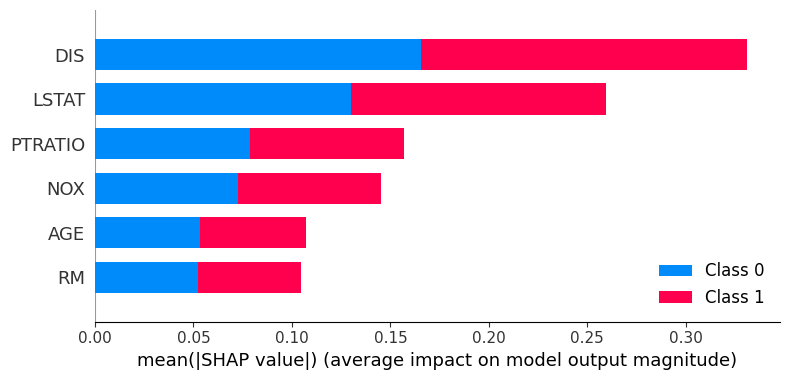

In [29]:
np.random.seed(42)
X = pd.DataFrame({
    'LSTAT': np.random.rand(100),
    'RM': np.random.rand(100),
    'NOX': np.random.rand(100),
    'PTRATIO': np.random.rand(100),
    'DIS': np.random.rand(100),
    'AGE': np.random.rand(100),
})
y = (X['LSTAT'] + X['RM'] + X['NOX'] + X['PTRATIO'] + X['DIS'] + X['AGE'] > 3).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

explainer_shap = shap.TreeExplainer(model)
shap_values = explainer_shap.shap_values(X_test)

shap.summary_plot(shap_values, X_test, feature_names=X.columns)
plt.show()

marker is redundantly defined by the 'marker' keyword argument and the fmt string "v" (-> marker='v'). The keyword argument will take precedence.


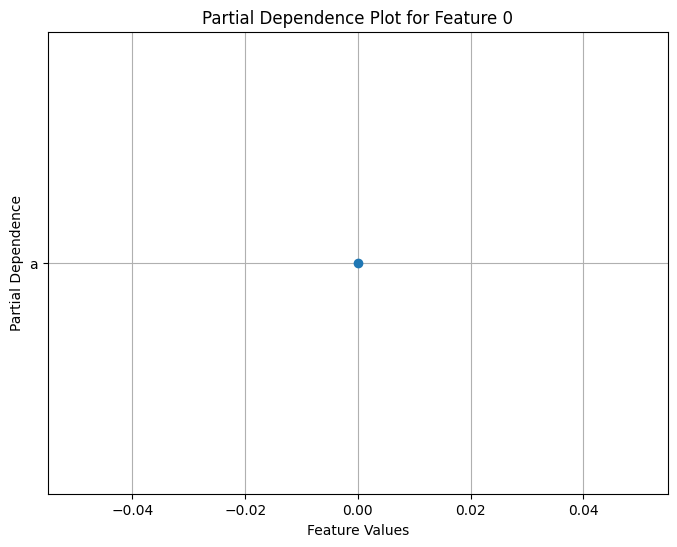

In [44]:

feature_index = 0

temp, pdp, axes = partial_dependence(model, X, [feature_index])

plt.figure(figsize=(8, 6))
plt.plot(axes[0], pdp[0], marker='o')
plt.xlabel('Feature Values')
plt.ylabel('Partial Dependence')
plt.title(f'Partial Dependence Plot for Feature {feature_index}')
plt.grid(True)
plt.show()